# Proyecto University Admission
Fabian Salazar, Raul Echeverry y Esteban Ordoñez

## 1. Librerías básicas a utilizar

- Pandas: para el análisis de datos a través de dataframes (data tabular)
- Numpy: para todo lo relacionado con manipulación de arreglos y análisis numérico
- Seaborn y matplotlib.pyplot: para visualización de datos

In [3]:
# Importar librerías

# Manejo de analísis de datos a través de dataframes (data tabular)
import pandas as pd
# Manipulación de arreglos y análisis numérico
import numpy as np
# Visualización de datos
import seaborn as sns
# Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline

# Librería para el manejo de expresiones regulares
import re

import warnings
warnings.filterwarnings("ignore")

## 2. Lectura de los datos

- El primer paso es la Lectura del archivo csv a un dataframe de pandas
- Se trata de una tarea de regresión ya que la variable objetivo es la oportunidad de admisión - <strong>Chance_of_Admission</strong> (tipo continua)

In [173]:
df = df = pd.read_csv(r'https://raw.githubusercontent.com/alfa7g7/Gestion-estrategica-I/main/1_tareas_regresion/university_admission.csv')
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
995,332,108,5,4.5,4.0,9.02,1,0.87
996,337,117,5,5.0,5.0,9.87,1,0.96
997,330,120,5,4.5,5.0,9.56,1,0.93
998,312,103,4,4.0,5.0,8.43,0,0.73


Al hacer el llamado al dataframe, podemos dar un primer vistazo al conjunto de datos. 

## 3. Análisis Exploratorio de Datos

- Limpieza de datos
- Exploración de datos
- Ingeniería de datos

### 3.1. Limpieza de datos

Para realizar una apropiada limpieza de datos se deben entender cada una de las variables presentes dentro del conjunto de datos.

Elementos a tener en cuenta:
- El significado y tipo (e.g. nominal/ordinal/intervalo/ratio) de cada una de las variables
- Identificación de valores faltantes y en caso de haberlos plantear las opciones para tratarlos
- Presencia de datos atípicos y en caso de haberlos identificar la manera de tratarlos

In [5]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

Formateamos los nombres de las variables: a pesar de que las variables no tienen espacios, si se presentan letras en mayúsculas

In [6]:
def format_columns(df):
    result = df.copy()
    new_cols = []
    for col in result.columns:
        new_cols.append(re.sub(r'\s+', ' ',col.strip()).replace(' ','_').lower())
    result.columns = new_cols
    return result

Descripciones de variables

- GRE_Score **(Ratio - Discreta)**: Puntuación en el Graduate Record Examination (GRE), un examen estandarizado utilizado para la admisión a programas de posgrado cuyo rango es desde 260 hasta 340.
- TOEFL_Score **(Ratio - Discreta)**: Puntuación en el Test of English as a Foreign Language (TOEFL), un examen estandarizado para medir la habilidad en inglés de hablantes no nativos cuyo rango es desde 0 hasta 120.
- University_Rating **(Ordinal)**: Calificación de la universidad, generalmente en una escala de 1 a 5, donde 5 es la más alta.
- SOP **(Ratio - Continua)**: Strength of Statement of Purpose (Fuerza de la declaración de propósito), calificada en una escala de 1 a 5.
- LOR **(Ratio - Continua)**: Strength of Letters of Recommendation (Fuerza de las cartas de recomendación), calificada en una escala de 1 a 5.
- CGPA **(Ratio - Continua)**: Cumulative Grade Point Average (Promedio acumulativo de calificaciones),  en una escala de 10.
- Research **(Nominal)**: Indicador binario de investigación, donde 1 indica que el estudiante ha realizado investigaciones y 0 indica que no.
- Chance_of_Admission **(Ratio - Continua)**: Probabilidad de admisión, generalmente representada como un valor decimal entre 0 y 1.

In [120]:
# Creamos un Transformer para renombrar columnas
class Rename_columns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = format_columns(result)
        return result

In [121]:
df_renamed = Rename_columns().fit_transform(df)

In [122]:
df_renamed.columns

Index(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa',
       'research', 'chance_of_admission'],
      dtype='object')

### Valores faltantes

- Detección de valores faltantes
- Manejo de valores faltantes

### ¿Qué podemos hacer con estos?

- Identificar valores faltantes (no necesariamente representados por null)
- Imputarlos
- Eliminarlos (registros o columnas)

In [123]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gre_score            1000 non-null   int64   
 1   toefl_score          1000 non-null   int64   
 2   university_rating    1000 non-null   category
 3   sop                  1000 non-null   float64 
 4   lor                  1000 non-null   float64 
 5   cgpa                 1000 non-null   float64 
 6   research             1000 non-null   category
 7   chance_of_admission  1000 non-null   float64 
dtypes: category(2), float64(4), int64(2)
memory usage: 49.3 KB


In [124]:
df_renamed.isnull().sum()

gre_score              0
toefl_score            0
university_rating      0
sop                    0
lor                    0
cgpa                   0
research               0
chance_of_admission    0
dtype: int64

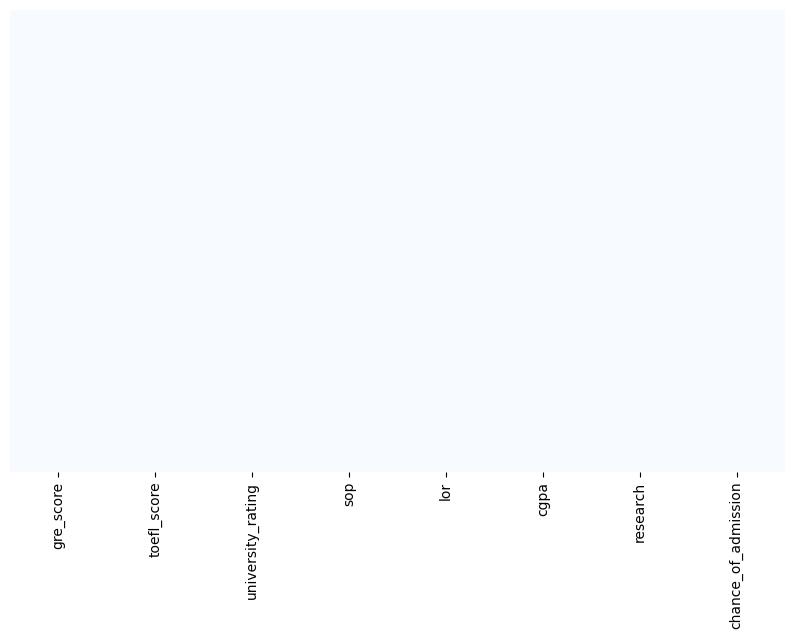

In [125]:
plt.figure(figsize=(10,6))
sns.heatmap(df_renamed.isnull(), yticklabels=False, cbar=False,cmap="Blues")
plt.show()

No se identifican datos nulos explícitos.

Vamos a revisar aquellos que no son explícitamente nulos:
- Utilizamos el método describe para revisar cada variable para revisar si su descripción tiene sentido. 

In [126]:
df_renamed.describe()

,gre_score,toefl_score,sop,lor,cgpa,chance_of_admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,316.472000,107.193000,3.374000,3.484000,8.57644,0.72174
std,11.289494,6.079368,0.990507,0.924986,0.60451,0.14107
min,290.000000,92.000000,1.000000,1.000000,6.80000,0.34000
25%,308.000000,103.000000,2.500000,3.000000,8.12750,0.63000
50%,317.000000,107.000000,3.500000,3.500000,8.56000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,9.04000,0.82000
max,340.000000,120.000000,5.000000,5.000000,9.92000,0.97000


Todas las variables se encuentran en los rangos máximos y mínimos, por ende no existe presencia de valores nulos implícitos

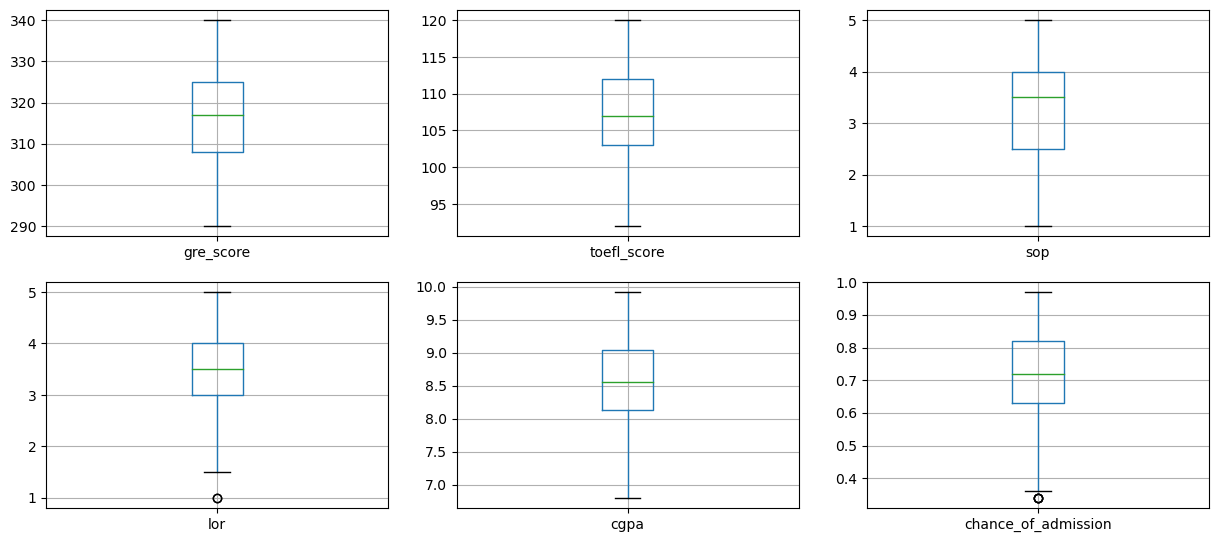

In [131]:
# Utilizamos diagramas de cajas y bigotes para verificar todas las variables
plt.figure(figsize=(15,10))
for i, col in enumerate(['gre_score', 'toefl_score', 'sop', 'lor', 'cgpa',
        'chance_of_admission'], start=1):
    plt.subplot(3, 3, i)
    df_renamed.boxplot(col)

¿Qué obtenemos a partir de este análisis?

El dataset da muestra de tener consistencia y no presencia de datos nulos.

### Valores atípicos
Visualizamos utilizando
- Diagramas de cajas y bigotes
- Histogramas

In [133]:
# Función para graficar los valores continuos del dataframe
def outliers_visual(data):
    cont_vars = list(data.select_dtypes('number').columns)
    plt.figure(figsize=(15, 40))
    i = 0
    val = int(len(cont_vars)/2) + 1
    for col in cont_vars:
        i += 1
        plt.subplot(val, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(val, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
        
    plt.show()

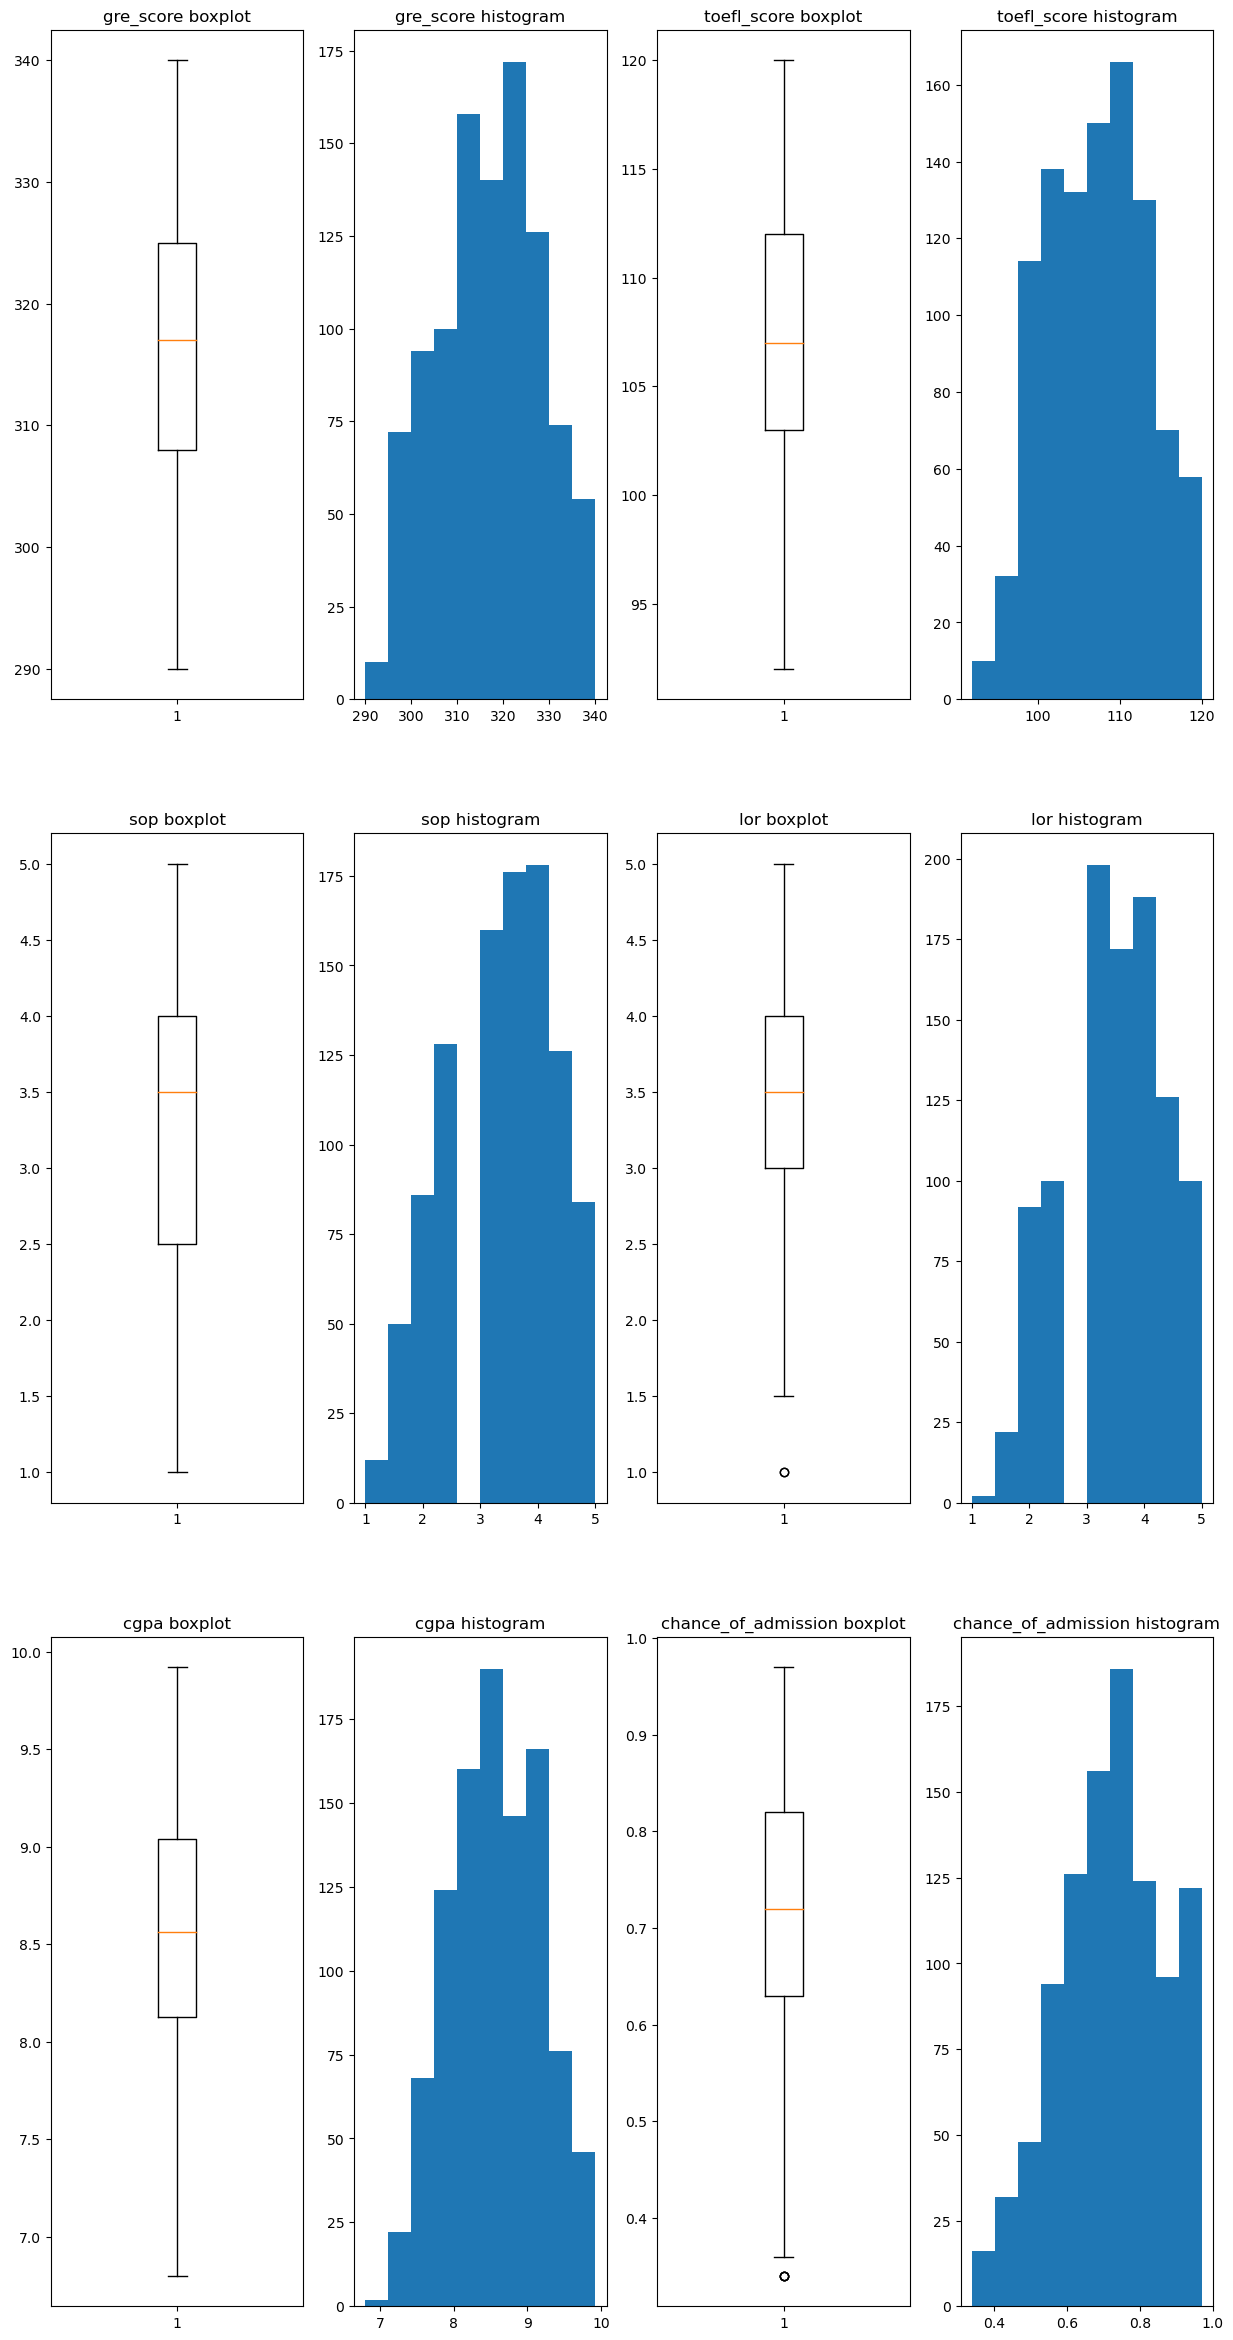

In [134]:
outliers_visual(df_renamed[['gre_score', 'toefl_score',  'sop', 'lor', 'cgpa',
        'chance_of_admission']])

Utilizando los gráficos anteriores podemos observar las distribuciones para cada variable continua.

Visualmente resulta claro que no existen outliers, sin embargo la variable LOR y la variable objetivo que muestran unos puntos por fuera del diagrama de caja, por tanto, es pertinente un análisis mas profundo en estos casos.

En la variable LOR se puede identificar un dato que aunque podría considerarse típico, se encuentra en la escala permitida, solamente que dicho registro tuvo la calificación mínima. Verificamos los registros con LOR = 1 solo para cerciorarse de que no sean datos atípicos, puesto que dado una calificación tan baja en esta variable se intuye que la oportunidad de admisión debe ser también relativamente baja.

In [136]:
lor_equals_one = df_renamed[df_renamed['lor'] == 1]
lor_equals_one

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admission
347,299,94,1,1.0,1.0,7.34,0,0.42
847,299,94,1,1.0,1.0,7.34,0,0.42


De acuerdo con esta validación se puede concluir que esos datos bajo de LOR no podemos considerarlos atípicos dado que se encuentran en la escala y al ver su comportamiento en los valores más bajos se observa que también la oportunidad de admisión es baja.  

Por su parte los datos más bajos de Posibilidad de admisión también se analizan con respecto a las demás variables y como se puede identificar a continuación estos puntajes bajos también concuerdan con criterios con baja puntuación por ende los datos de Chance_of_Admission no podríamos identificarlos como outliers.

In [137]:
chad_equals_one = df_renamed[df_renamed['chance_of_admission'] == df_renamed['chance_of_admission'].min()]
chad_equals_one

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admission
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34
592,298,98,2,4.0,3.0,8.03,0,0.34
876,297,96,2,2.5,2.0,7.43,0,0.34


Sin embargo, para corroborar lo anterior, podemos usar el método de Tukey (se consideran como datos atípicos aquellos que están 1.5 veces por fuera del rango intercuartil).

In [29]:
# Función para calcular los datos atípicos utilizando el método de Tukey
def outlier_count(col, data):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
    return outlier_count

In [139]:
# Guardar las columnas de tipo continuas con datos atípicos
cont_vars = []
for col in list(df_renamed.select_dtypes('number').columns):
    if outlier_count(col, df_renamed) > 0:
        cont_vars.append(col)

---------------gre_score---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------toefl_score---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------sop---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------lor---------------
Number of outliers: 2
Percent of data that is outlier: 0.2%
---------------cgpa---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------chance_of_admission---------------
Number of outliers: 4
Percent of data that is outlier: 0.4%


Estos outliers detectaros con tukey son los mismo que se ahondaron anteriormente lo squeles se concluye que a pesar que puede denotarse como outliers con base en los datos, en la realidad no lo son, igualmente no tiene gran representatividad en el dataset, puesto que son tan solo 6 en total. 

### 3.2. Exploración de datos
- Análisis univariado
    - Variables continuas
    - Variables categóricas
- Análisis Bivariado
    - Variables continuas comparadas con variable objetivo y entre sí
    - Variables categóricas con respecto a variable objetivo

### Análisis univariado

La idea con este este análisis es ver cada variable por sí sola. Generalmente se realiza con la ayuda de histogramas para variables continuas y countplots o barplot para datos categóricos. Además de incluir los reportes estadísticos que no deben faltar.

In [140]:
# Descriptores estadísticos para valores continuos
df_renamed[['gre_score', 'toefl_score',  'sop', 'lor', 'cgpa',
        'chance_of_admission']].describe()

,gre_score,toefl_score,sop,lor,cgpa,chance_of_admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,316.472000,107.193000,3.374000,3.484000,8.57644,0.72174
std,11.289494,6.079368,0.990507,0.924986,0.60451,0.14107
min,290.000000,92.000000,1.000000,1.000000,6.80000,0.34000
25%,308.000000,103.000000,2.500000,3.000000,8.12750,0.63000
50%,317.000000,107.000000,3.500000,3.500000,8.56000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,9.04000,0.82000
max,340.000000,120.000000,5.000000,5.000000,9.92000,0.97000


In [142]:
# Descriptores estadísticos para valores categóricos


# Convertir las columnas a tipo categórico
df_renamed['university_rating'] = df_renamed['university_rating'].astype('category')
df_renamed['research'] = df_renamed['research'].astype('category')

# Obtener descriptores estadísticos
print(df_renamed[['university_rating', 'research']].describe(include='category'))

        university_rating  research
count                1000      1000
unique                  5         2
top                     3         1
freq                  324       560


In [143]:
# Función para visualizar las distribuciones de las variables continuas
def visualize_distributions(df):
    cols = df.select_dtypes('number').columns
    val = int(len(cols)/2)+1
    plt.figure(figsize=(15, 30))
    for i, col in enumerate(cols, 1):
        plt.subplot(val, 4, i)
        plt.hist(df[col])
        plt.title(col)

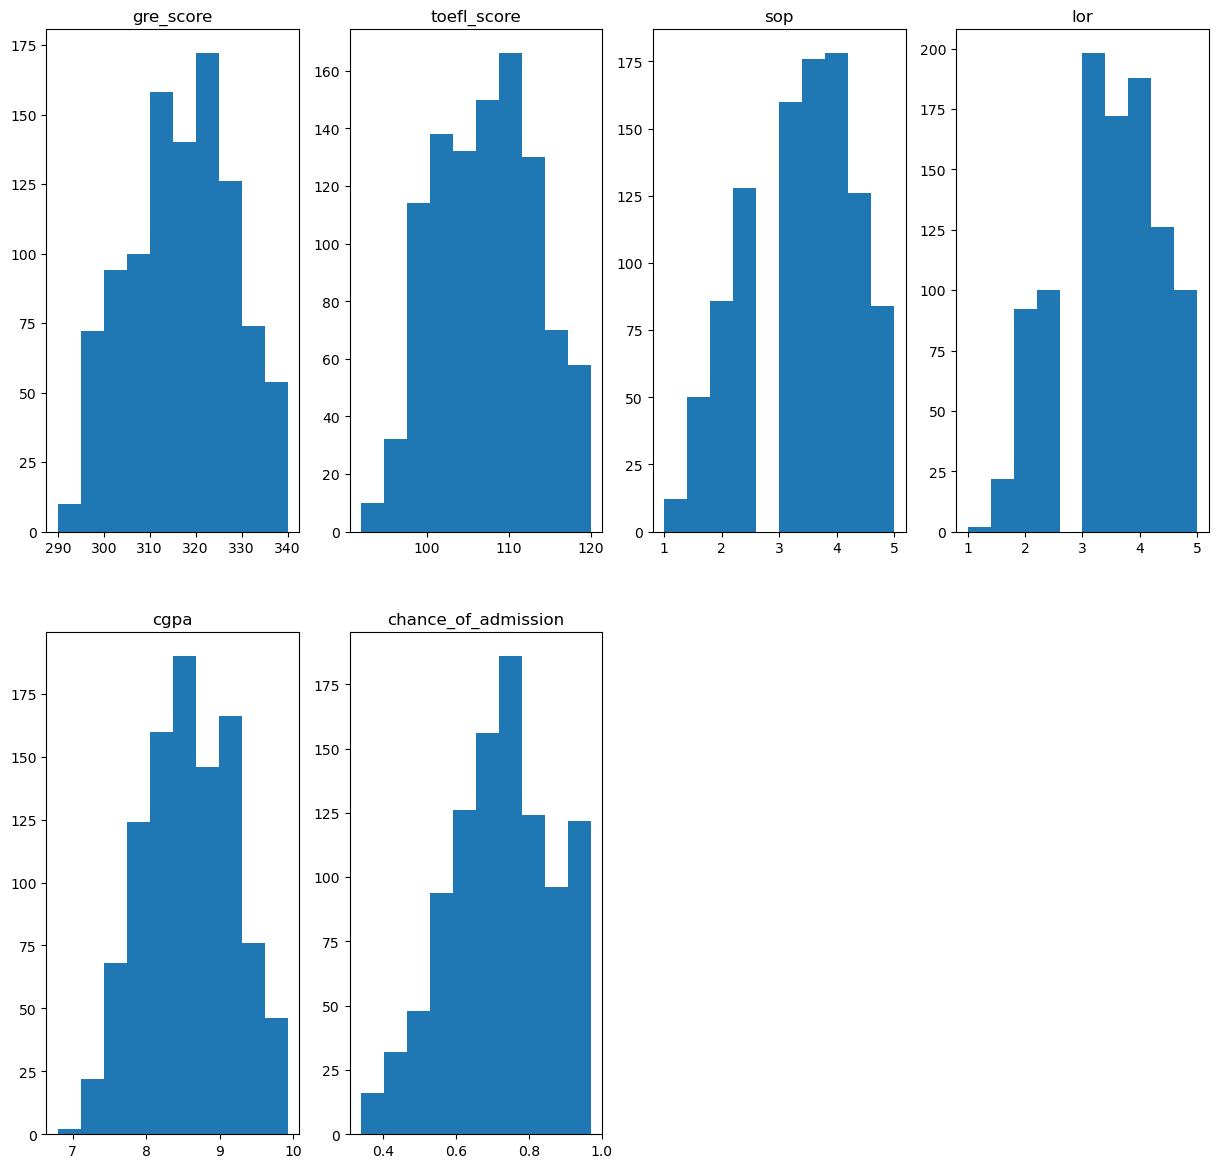

In [144]:
# Visualizamos la distribución de las variables continuas
visualize_distributions(df_renamed)

La mayoría de las variables independientes (GRE_Score, TOEFL_Score, SOP, LOR, CGPA) tienen distribuciones aproximadamente normales o unimodales.
La variable objetivo Chance_of_Admission tiene una distribución bimodal, lo que podría indicar una segmentación natural en los datos (por ejemplo, estudiantes con altas y bajas probabilidades de admisión).

Relación Potencial:

- Dado que la mayoría de las variables tienen distribuciones normales, es probable que estas variables tengan una relación lineal con la Chance_of_Admission.
- Las variables como GRE_Score, TOEFL_Score, y CGPA, que tienen distribuciones más centradas, podrían tener una mayor influencia en la predicción de la probabilidad de admisión.
- Las variables SOP y LOR, aunque sesgadas, también pueden proporcionar información valiosa, especialmente si las calificaciones más altas tienden a correlacionarse con una mayor Chance_of_Admission.

In [145]:
# Función para graficar las frecuencias de las columnas categóricas
def plot_frequencies(data, categorical_columns):
    plt.figure(figsize=(15, 10 * len(categorical_columns) // 2))
    i = 1
    for col in categorical_columns:
        plt.subplot(len(categorical_columns), 2, i)
        value_counts = data[col].value_counts().sort_index()
        value_counts.plot(kind='bar')
        
        # Agregar etiquetas a cada barra
        for index, value in enumerate(value_counts):
            plt.text(index, value, str(value), ha='center', va='bottom')
        
        plt.title(f'Frecuencia de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        i += 1
    
    plt.tight_layout()
    plt.show()

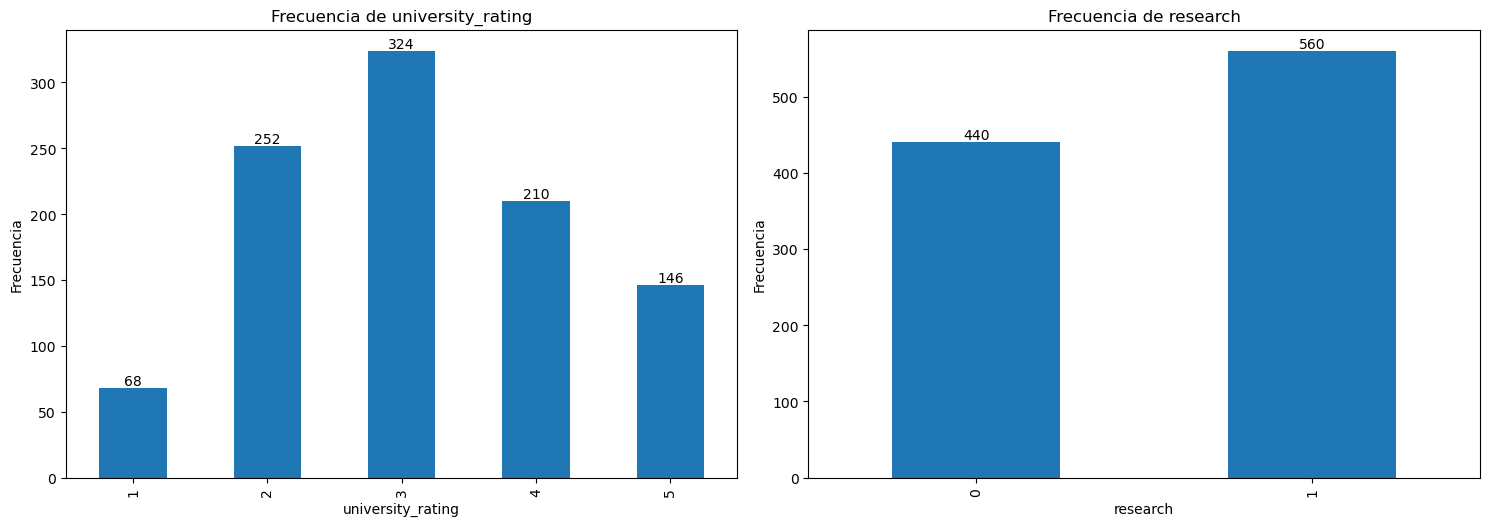

In [146]:
# Distribución las columnas 'University_Rating' y 'Research'
categorical_columns = ['university_rating', 'research']
plot_frequencies(df_renamed, categorical_columns)

University_Rating:

- La distribución de las calificaciones universitarias está centrada en el rango medio (2, 3, 4), con la calificación "3" siendo la más común. Esto puede indicar que la mayoría de las universidades tienen un rendimiento o una reputación moderadamente alta.
- Las calificaciones extremas (1 y 5) son menos comunes, sugiriendo que hay pocas universidades que se destacan como muy bajas o muy altas en calificación.


Research:

- Más de la mitad de los estudiantes han realizado investigaciones, lo cual puede ser un indicativo de una inclinación hacia la investigación en el perfil estudiantil.
- La experiencia en investigación es un aspecto notablemente común, aunque una porción significativa de estudiantes no tiene esta experiencia.

### Análisis Bivariado
Aspectos de relevancia a tener en cuenta:
- Variables continuas con respecto a posiblidad de admisión (independientes vs dependiente) y entre ellas
- Variables categóricas con respecto a posiblidad de admisión (independientes vs dependiente)
- Variables categóricas con respecto a continuas (Caso de rating y research vs las demás)

In [147]:
# Matriz de correlación entre variables continuas
df_renamed[df_renamed.select_dtypes('number').columns].corr()

,gre_score,toefl_score,sop,lor,cgpa,chance_of_admission
gre_score,1.000000,0.827076,0.613498,0.524679,0.825878,0.810351
toefl_score,0.827076,1.000000,0.644374,0.541340,0.810644,0.791921
sop,0.613498,0.644374,1.000000,0.663707,0.712154,0.684137
lor,0.524679,0.541340,0.663707,1.000000,0.637469,0.645365
cgpa,0.825878,0.810644,0.712154,0.637469,1.000000,0.882413
chance_of_admission,0.810351,0.791921,0.684137,0.645365,0.882413,1.000000


In [148]:
def correlation_matrix(df,y=True):
    if y:
        cont_vars = list(df.select_dtypes('number').columns)
    else:
        cont_vars = list(df.select_dtypes('number').columns)
    mask = np.triu(df[cont_vars].corr())
    plt.figure(figsize=(20,10))
    sns.heatmap(df[cont_vars].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
    plt.ylim(len(df.select_dtypes(include=['number']).columns), 0)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

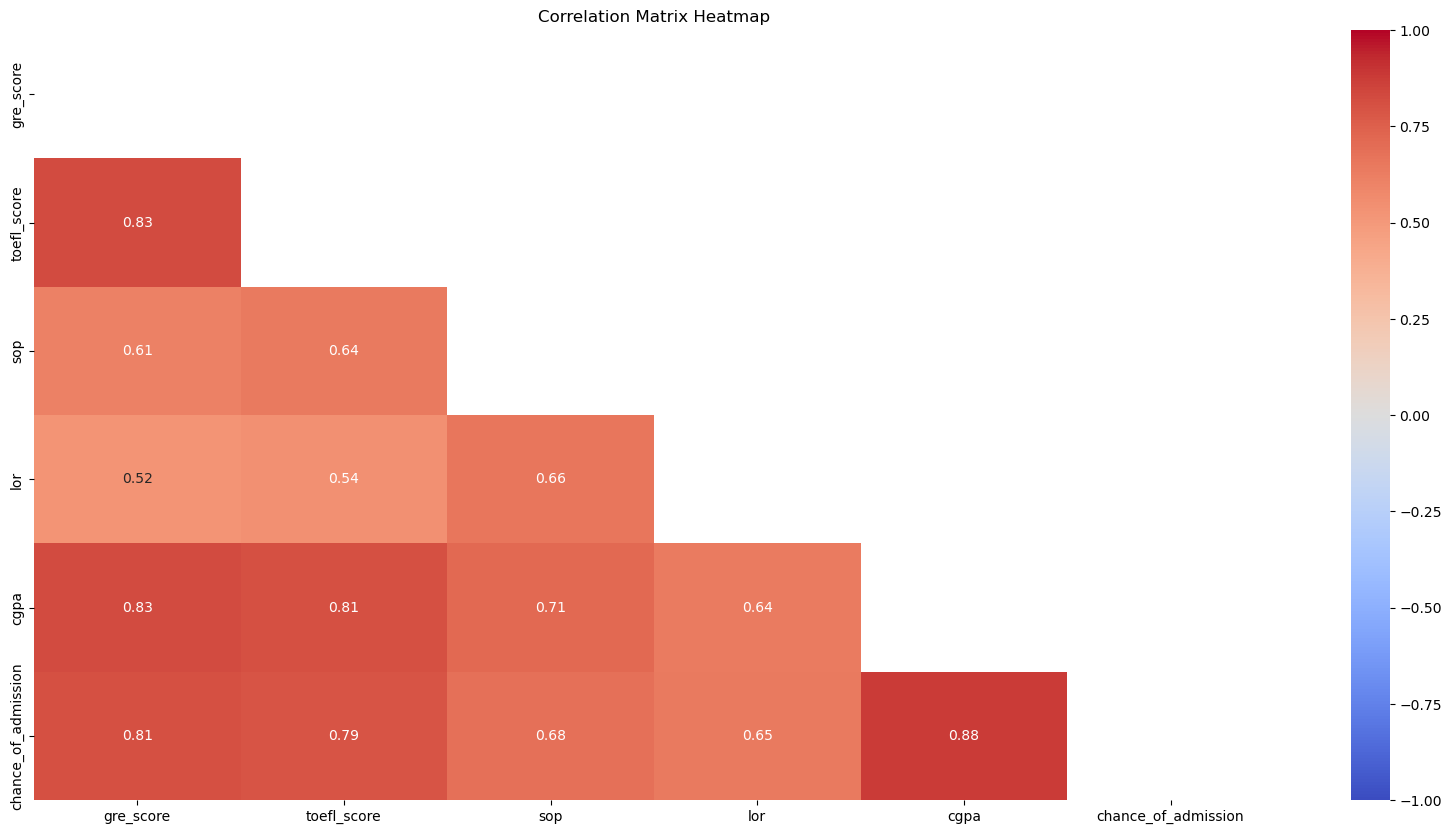

In [149]:
correlation_matrix(df_renamed)

Utilizando la matriz podemos observar importantes correlaciones entre variables, en donde a simple vista detectamos unciamente correlaciones positívas:
- Posibilidad de admisión está altamente correlacionada con:
    - GRE_Score (positiva) - Puntuación en el Graduate Record Examination
    - CGPA (Positiva) - Promedio acumulativo de calificaciones
    - TOEFL_Score (positiva) -Puntuación en el Test of English as a Foreign Language
- La variable objetivo se encuentra medianamente correlacionada con LOR (Fuerza de la declaración de propósito) y SOP (Fuerza de las cartas de recomendación)
- CGPA (Promedio acumulativo de calificaciones) evidentemente están altamente correlacionada con GRE_Score, TOEFL_Score y  SOP.
- TOEFL_Score se encuentra altamente correlacionada con GRE_Score 


Se debe evitar variables independientes altamente correlacionadas entre sí. Igualmente, las variables independientes altamente correlacionadas con la variable dependiente pueden resultar más importante a la hora de implementar los modelos

In [150]:
def visualize_chance_of_admission(df):
    sns.lineplot(data=df, x='university_rating', y='chance_of_admission', marker='o')
    plt.title('chance of admission for university_rating')
    plt.show()

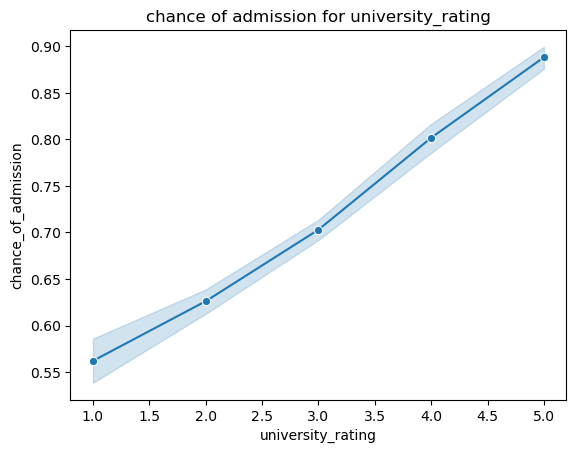

In [151]:
visualize_chance_of_admission(df_renamed)

A partir del gráfico anterior podemos observar una tendencia, hay que corroborar si resulta significativa para incluirla dentro del modelo

In [152]:
df_renamed.university_rating.corr(df_renamed.chance_of_admission)

0.6901323687886888

Existe una correlación moderada, se debe indagar a más profundidad si las diferencias entre los ranking de las universidades resultan considerables para considerarlos distintos.

Un A-test resultaría útil para verificar.

In [156]:
from scipy import stats

def t_testing_rating(df):
    ratings = list(df.university_rating.unique())
    ratings.sort()
    rating_le = {}
    for rating in ratings:
        rating_data = df[df.university_rating == rating].chance_of_admission
        rating_le[rating] = rating_data
    for rating in ratings[:-1]:
        print(10*'-' + str(rating) + ' to ' + str(rating+1) + 10*'-')
        print(stats.ttest_ind(rating_le[rating], rating_le[rating+1], equal_var=False))

In [157]:
t_testing_rating(df_renamed)

----------1 to 2----------
TtestResult(statistic=-4.656099096737762, pvalue=8.789424072855965e-06, df=113.78069876521847)
----------2 to 3----------
TtestResult(statistic=-8.82068214427715, pvalue=1.774487654783634e-17, df=514.0418258779707)
----------3 to 4----------
TtestResult(statistic=-10.125835829538152, pvalue=1.4823524483505005e-21, df=390.82942144799176)
----------4 to 5----------
TtestResult(statistic=-8.510846829404299, pvalue=5.073272090492255e-16, df=351.4736801360325)


Teniendo en cuenta que para un t-test si el valor del p-value es menor que 0.05 es considerado como estadísticamente significativo, podemos observar que la diferencia entre ranking de universidades para la posibilidad de admisión resulta significativa. 

Ahora revisamos para el caso de research. Observando la diferencia entre si  y no con respecto de la posibilidad de admisión.

In [158]:
df_renamed.groupby('research').chance_of_admission.agg(['mean'])

,mean
research,
0,0.634909
1,0.789964


Se observa que los estudiantes con experiencia investigativa parecen tener una posibilidad de admisión más alta. Para corroborar podemos utilizar un t-test.

In [159]:
def t_testing_research(df):
    yes_research_ad = df[df.research == 1].chance_of_admission
    no_research_ad = df[df.research == 0].chance_of_admission
    print(stats.ttest_ind(yes_research_ad, no_research_ad, equal_var=False)) 

In [160]:
t_testing_research(df_renamed)

TtestResult(statistic=20.82046908168119, pvalue=5.6759203247446246e-80, df=977.3060614932782)


A partir del p-value se puede corroborar que las diferencias son muy significativas. Lo cual nos indica que status puede resultar importante para la implementación de futuros modelos.

### 3.3. Ingeniería de características

Vamos a eliminar y/o crear nuevas características que nos resulten útiles para la futura implementación de nuestros modelos

In [161]:
# Creamos un Transformer personalizado para dummificar la variable University_Rating
from sklearn.base import BaseEstimator, TransformerMixin
class Dummify(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = pd.get_dummies(result,columns=['university_rating'],dtype=float)
        return result

In [162]:
df_dummified = Dummify().fit_transform(df_renamed)
df_dummified

,gre_score,toefl_score,sop,lor,cgpa,research,chance_of_admission,university_rating_1,university_rating_2,university_rating_3,university_rating_4,university_rating_5
0,337,118,4.5,4.5,9.65,1,0.92,0.0,0.0,0.0,1.0,0.0
1,324,107,4.0,4.5,8.87,1,0.76,0.0,0.0,0.0,1.0,0.0
2,316,104,3.0,3.5,8.00,1,0.72,0.0,0.0,1.0,0.0,0.0
3,322,110,3.5,2.5,8.67,1,0.80,0.0,0.0,1.0,0.0,0.0
4,314,103,2.0,3.0,8.21,0,0.65,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,332,108,4.5,4.0,9.02,1,0.87,0.0,0.0,0.0,0.0,1.0
996,337,117,5.0,5.0,9.87,1,0.96,0.0,0.0,0.0,0.0,1.0
997,330,120,4.5,5.0,9.56,1,0.93,0.0,0.0,0.0,0.0,1.0
998,312,103,4.0,5.0,8.43,0,0.73,0.0,0.0,0.0,1.0,0.0


In [163]:
def convertir_research_a_float(df):
    df['research'] = df['research'].astype(float)
    return df

In [164]:
convertir_research_a_float(df_dummified)

,gre_score,toefl_score,sop,lor,cgpa,research,chance_of_admission,university_rating_1,university_rating_2,university_rating_3,university_rating_4,university_rating_5
0,337,118,4.5,4.5,9.65,1.0,0.92,0.0,0.0,0.0,1.0,0.0
1,324,107,4.0,4.5,8.87,1.0,0.76,0.0,0.0,0.0,1.0,0.0
2,316,104,3.0,3.5,8.00,1.0,0.72,0.0,0.0,1.0,0.0,0.0
3,322,110,3.5,2.5,8.67,1.0,0.80,0.0,0.0,1.0,0.0,0.0
4,314,103,2.0,3.0,8.21,0.0,0.65,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,332,108,4.5,4.0,9.02,1.0,0.87,0.0,0.0,0.0,0.0,1.0
996,337,117,5.0,5.0,9.87,1.0,0.96,0.0,0.0,0.0,0.0,1.0
997,330,120,4.5,5.0,9.56,1.0,0.93,0.0,0.0,0.0,0.0,1.0
998,312,103,4.0,5.0,8.43,0.0,0.73,0.0,0.0,0.0,1.0,0.0


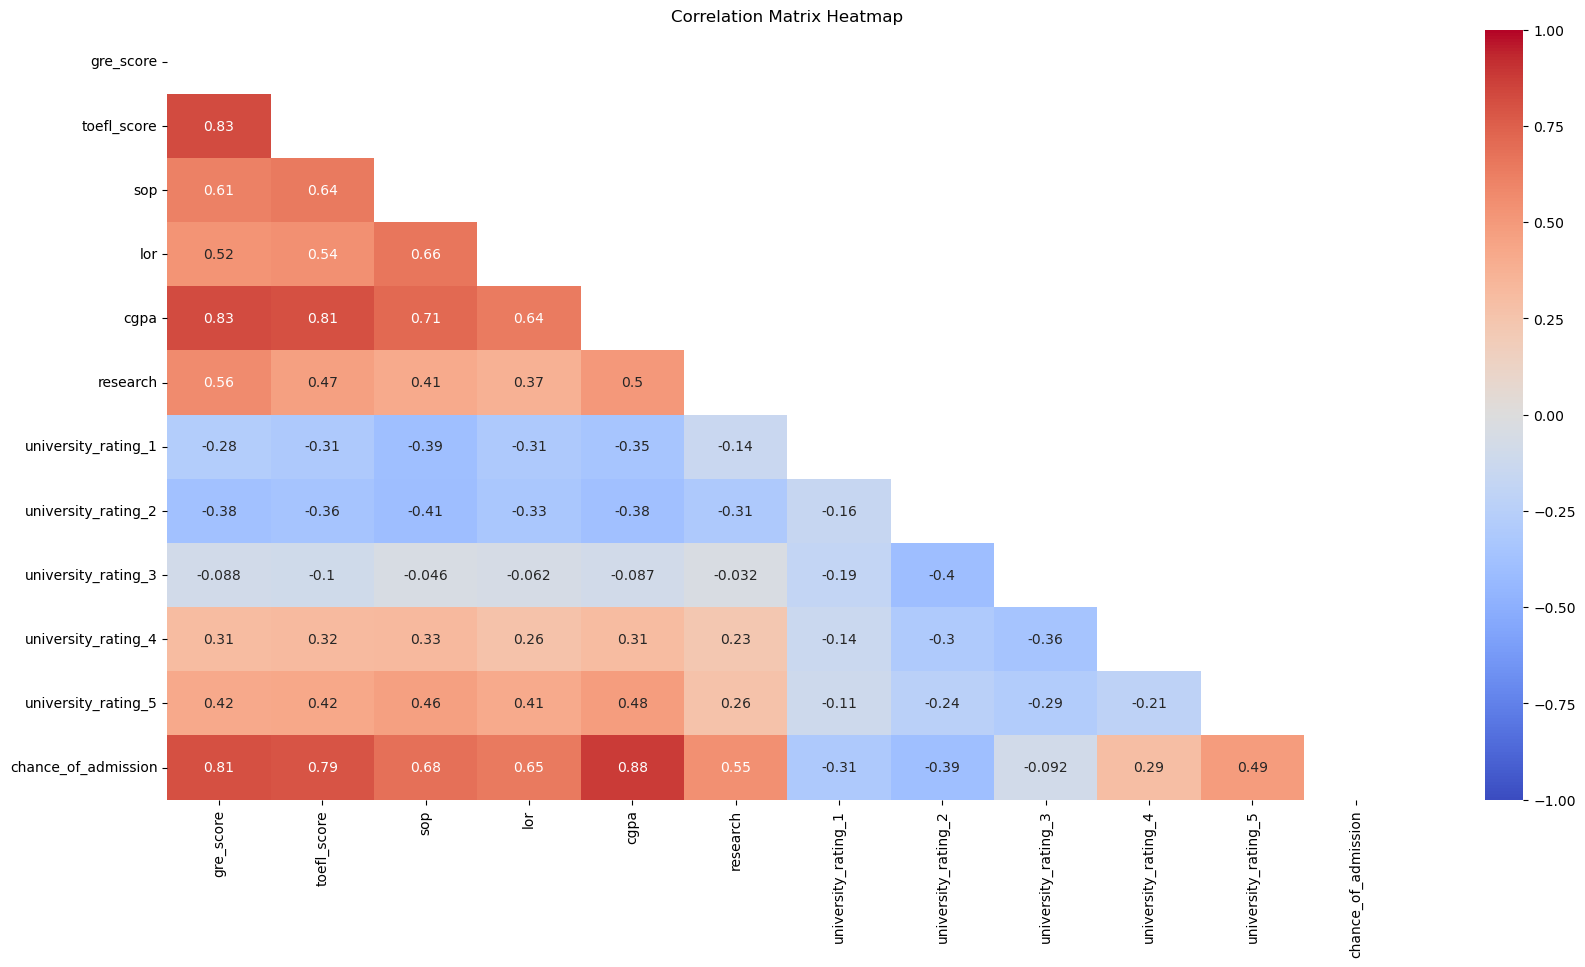

In [166]:
correlation_matrix(df_dummified[['gre_score', 'toefl_score', 'sop', 'lor', 'cgpa', 'research',
        'university_rating_1', 'university_rating_2',
       'university_rating_3', 'university_rating_4', 'university_rating_5', 'chance_of_admission']], False)


Las siguientes variables podemos considerarlas como altamente correlacionadas entre sí (correlación > .7 o correlación < -.7):

- TOEFL_Score/GRE_Score: 0.83 (hacer drop de TOEFL_Score ya que GRE_Score está más altamente correlacionados con la posibilidad de admisión)
- GRE_Score/CGPA: 0.83 (hacer drop de GRE_Score ya que CGPA está más altamente correlacionados con la posibilidad de admisión)
- TOEFL_Score/CGPA: 0.81 (concuerda como anterioremente se menciona de hacer drop de TOEFL_Score)
- CGPA/SOP: 0.71 (hacer drop de SOP ya que CGPA está más altamente correlacionados con la posibilidad de admisión)


Puede resultar útil eliminar las variables que no se encuentren muy correlacionadas con la esperanza de vida.
- University_Rating_3

In [167]:
# Creamos un Transformer personalizado para realizar la eliminación de variables
# a partir de sus correlaciones
class Remove_highly_correlated_features(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.drop(columns=['toefl_score', 'gre_score','sop',
                                      'university_rating_3'])
        return result

In [169]:
df_dummified_removed = Remove_highly_correlated_features().fit_transform(df_dummified)
df_dummified_removed = df_dummified_removed[['chance_of_admission', 'lor', 'cgpa', 'research', 'university_rating_1',
       'university_rating_2', 'university_rating_4', 'university_rating_5']]
df_dummified_removed


,chance_of_admission,lor,cgpa,research,university_rating_1,university_rating_2,university_rating_4,university_rating_5
0,0.92,4.5,9.65,1.0,0.0,0.0,1.0,0.0
1,0.76,4.5,8.87,1.0,0.0,0.0,1.0,0.0
2,0.72,3.5,8.00,1.0,0.0,0.0,0.0,0.0
3,0.80,2.5,8.67,1.0,0.0,0.0,0.0,0.0
4,0.65,3.0,8.21,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
995,0.87,4.0,9.02,1.0,0.0,0.0,0.0,1.0
996,0.96,5.0,9.87,1.0,0.0,0.0,0.0,1.0
997,0.93,5.0,9.56,1.0,0.0,0.0,0.0,1.0
998,0.73,5.0,8.43,0.0,0.0,0.0,1.0,0.0


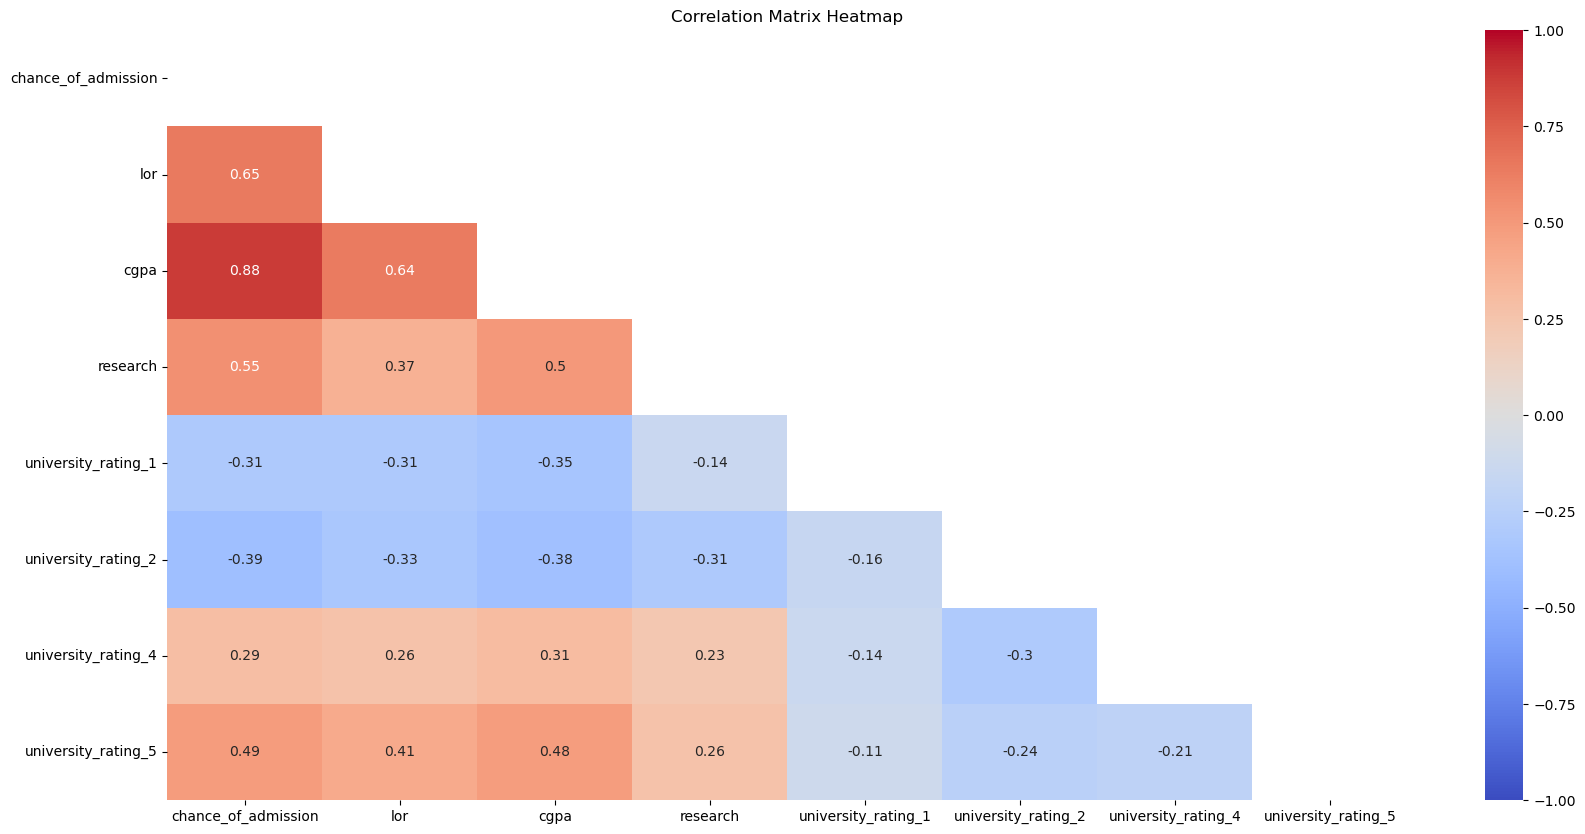

In [170]:
correlation_matrix(df_dummified_removed,False)

Hacemos uso de un pipeline para dejar listos nuestros dataframes que posteriormente utilizaremos para entrenar nuestros modelos

In [175]:
from sklearn.pipeline import Pipeline

pipe_rem = Pipeline(steps = [('rename columns',Rename_columns()),
                   ('Dummify categorical variables',Dummify()),
                   ('Remove highly correlated features',Remove_highly_correlated_features())])


df_pipeline_rem = pipe_rem.fit_transform(df)

### 4. Protocolos de evaluación

In [177]:
# Con nuestra primera aproximación (imputación con la media)
# Eliminación de variables altamente correlacionadas
# Utilizamos el holdout con un 30% para la prueba y 70% para el entrenamiento

def obtain_X_y(df):
    return df.drop(columns=['chance_of_admission']),df[['chance_of_admission']]

from sklearn.model_selection import train_test_split

X = dict()
y = dict()
X_train = dict()
y_train = dict()
X_test = dict()
y_test = dict()


X['rem'], y['rem'] = obtain_X_y(df_pipeline_rem)

X_train['rem'], X_test['rem'], y_train['rem'], y_test['rem'] = train_test_split(X['rem'],y['rem'],random_state=1234,test_size=0.3)
print(X_train['rem'].shape)
print(X_test['rem'].shape)
print(y_train['rem'].shape)
print(y_test['rem'].shape)

(700, 7)
(300, 7)
(700, 1)
(300, 1)


### 5. Métricas de evaluación

In [178]:
# Implementamos una función que nos permita calcular las métricas de regresión para el conjunto 
# de entrenamiento y de prueba
# R2, R2 Ajustado MAE, MAPE, MSE, RMSE
# El coeficiente de determinación se puede ver como la varianza total explicada por el modelo, 
# es decir la proporción de la varianza en la variable dependiente que se puede predecir a partir de 
# las variables independientes
# Nos retorna el modelo entrenado y un diccionario con las principales métricas sobre el conjunto de
# entrenamiento y el de prueba

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

def regression_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    k_train = X_train.shape[1]
    n_train = len(X_train)
    k_test = X_test.shape[1]
    n_test = len(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-k_train-1)
    adj_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-k_test-1)
    metrics = {"Training R^2": r2_train,
               "Test R^2": r2_test,
               "Training Adj R^2": adj_r2_train,
               "Test Adj R^2": adj_r2_test,
               "Training MAE": mean_absolute_error(y_train,y_pred_train),
               "Test MAE": mean_absolute_error(y_test,y_pred_test),
               "Training MAPE": mean_absolute_percentage_error(y_train,y_pred_train),
               "Test MAPE": mean_absolute_percentage_error(y_test,y_pred_test),
               "Training RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
               "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test))    
               }
    for item in metrics.items():
        print(item[0],"=",item[1])
    return model,metrics
    
def r2_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    k_train = X_train.shape[1]
    n_train = len(X_train)
    k_test = X_test.shape[1]
    n_test = len(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-k_train-1)
    adj_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-k_test-1)
    return r2_train, r2_test, adj_r2_train, adj_r2_test

## 6. Implementación de modelos